# Movies: Feature Engineering and Machine Learning Models

Problem Description

In this notebook I create a regression ML model to determine the revenue from a movie given certain parameters such as its production country, production language, popularity, TMDB vote count, Genre and budget. To normalize the revenue and budget, we worked with log scales. We needed to normalize the revenue and budget as the original data has an exponential distribution. Furthermore, from the original dataset, we dropped all movies with under $1000.00 budget or revenue; these datapoints are most likely a mix of missing data or errors. 

In [1]:
# importing Libraries and having plots to define plot showing in notebook.

%matplotlib inline
from collections import Counter
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import scipy
import matplotlib.pyplot as plt

# the more advanced python visualization library
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

# setting decimal numbers to three decimals only
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

In [2]:
#importing clean dataset with budgets and revenues over 1000
df_dataset_orig = pd.read_csv('df_movie_fixed.csv')

In [3]:
df_dataset_orig.head()

,budget,genres,movieId,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,keywords
0,30000000.000,"['Animation', 'Comedy', 'Family']",862,en,Toy Story,21.947,['Pixar Animation Studios'],['United States of America'],1995-10-30,373554033.000,81.000,Toy Story,7.700,5415.000,"['jealousy', 'toy', 'boy', 'friendship', 'frie..."
1,65000000.000,"['Adventure', 'Fantasy', 'Family']",8844,en,Jumanji,17.016,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,262797249.000,104.000,Jumanji,6.900,2413.000,"['board game', 'disappearance', ""based on chil..."
2,16000000.000,"['Comedy', 'Drama', 'Romance']",31357,en,Waiting to Exhale,3.859,['Twentieth Century Fox Film Corporation'],['United States of America'],1995-12-22,81452156.000,127.000,Waiting to Exhale,6.100,34.000,"['based on novel', 'interracial relationship',..."
3,60000000.000,"['Action', 'Crime', 'Drama', 'Thriller']",949,en,Heat,17.925,"['Regency Enterprises', 'Forward Pass', 'Warne...",['United States of America'],1995-12-15,187436818.000,170.000,Heat,7.700,1886.000,"['robbery', 'detective', 'bank', 'obsession', ..."
4,35000000.000,"['Action', 'Adventure', 'Thriller']",9091,en,Sudden Death,5.232,"['Universal Pictures', 'Imperial Entertainment...",['United States of America'],1995-12-22,64350171.000,106.000,Sudden Death,5.500,174.000,"['terrorist', 'hostage', 'explosive', 'vice pr..."


In [4]:
df_dataset_orig.shape

(5220, 15)

I am taking a log scale of the budget and revenue to normalize the distribution.

In [5]:

df_dataset_orig["revenue_log"]=df_dataset_orig['revenue'].apply(np.log)


In [6]:

df_dataset_orig["budget_log"]=df_dataset_orig['budget'].apply(np.log)

In [7]:
df_dataset_orig.head()

,budget,genres,movieId,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,keywords,revenue_log,budget_log
0,30000000.000,"['Animation', 'Comedy', 'Family']",862,en,Toy Story,21.947,['Pixar Animation Studios'],['United States of America'],1995-10-30,373554033.000,81.000,Toy Story,7.700,5415.000,"['jealousy', 'toy', 'boy', 'friendship', 'frie...",19.739,17.217
1,65000000.000,"['Adventure', 'Fantasy', 'Family']",8844,en,Jumanji,17.016,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,262797249.000,104.000,Jumanji,6.900,2413.000,"['board game', 'disappearance', ""based on chil...",19.387,17.990
2,16000000.000,"['Comedy', 'Drama', 'Romance']",31357,en,Waiting to Exhale,3.859,['Twentieth Century Fox Film Corporation'],['United States of America'],1995-12-22,81452156.000,127.000,Waiting to Exhale,6.100,34.000,"['based on novel', 'interracial relationship',...",18.216,16.588
3,60000000.000,"['Action', 'Crime', 'Drama', 'Thriller']",949,en,Heat,17.925,"['Regency Enterprises', 'Forward Pass', 'Warne...",['United States of America'],1995-12-15,187436818.000,170.000,Heat,7.700,1886.000,"['robbery', 'detective', 'bank', 'obsession', ...",19.049,17.910
4,35000000.000,"['Action', 'Adventure', 'Thriller']",9091,en,Sudden Death,5.232,"['Universal Pictures', 'Imperial Entertainment...",['United States of America'],1995-12-22,64350171.000,106.000,Sudden Death,5.500,174.000,"['terrorist', 'hostage', 'explosive', 'vice pr...",17.980,17.371


# LOGGED SCALE EXPLORATION

We see a very pretty normal distribution for both the revenue and budget when it is log scaled.

LOGGED REVENUE

In [8]:
print('log scaled revenue details')
df_dataset_orig["revenue_log"].describe()


log scaled revenue details


count   5220.000
mean      16.940
std        2.166
min        7.247
25%       15.895
50%       17.281
75%       18.445
max       21.749
Name: revenue_log, dtype: float64

Text(0.5,1,'Revenue_log Distribution')

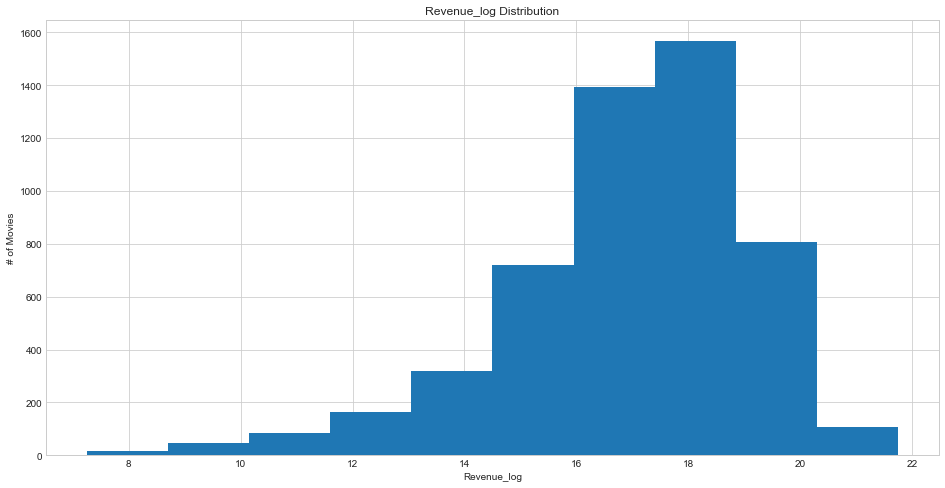

In [9]:
plt.rcParams['figure.figsize'] = [16, 8]
df_dataset_orig["revenue_log"].hist()
plt.xlabel('Revenue_log')
plt.ylabel('# of Movies')
plt.title('Revenue_log Distribution')

LOGGED BUDGET

In [10]:
print('log scaled budget details')
df_dataset_orig["budget_log"].describe()

log scaled budget details


count   5220.000
mean      16.452
std        1.567
min        7.824
25%       15.607
50%       16.706
75%       17.504
max       19.756
Name: budget_log, dtype: float64

Text(0.5,1,'Budget_log Distribution')

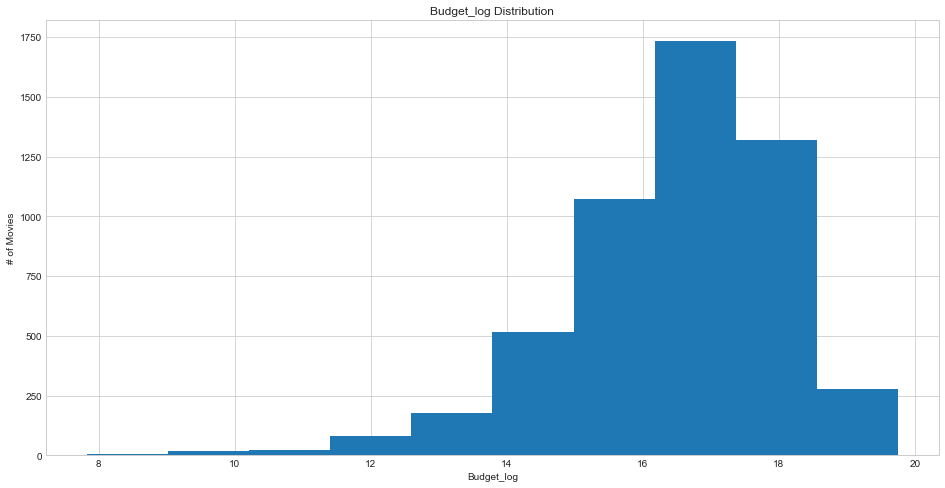

In [11]:
plt.rcParams['figure.figsize'] = [16, 8]
df_dataset_orig["budget_log"].hist()
plt.xlabel('Budget_log')
plt.ylabel('# of Movies')
plt.title('Budget_log Distribution')

In [12]:
df_dataset_orig.columns

Index(['budget', 'genres', 'movieId', 'original_language', 'original_title',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'title', 'vote_average',
       'vote_count', 'keywords', 'revenue_log', 'budget_log'],
      dtype='object')

# Additional Feature Engineering

Creating Proper Columns for Feature Engineering

In [13]:
#Removing Brackets from categorical columns with muliple values
for mixcol in ['genres','production_companies','production_countries','keywords']:
    df_dataset_orig[str(mixcol)] = df_dataset_orig[str(mixcol)].apply(lambda x: x.strip("[]"))

In [14]:
df_dataset_orig.head()

,budget,genres,movieId,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,keywords,revenue_log,budget_log
0,30000000.000,"'Animation', 'Comedy', 'Family'",862,en,Toy Story,21.947,'Pixar Animation Studios','United States of America',1995-10-30,373554033.000,81.000,Toy Story,7.700,5415.000,"'jealousy', 'toy', 'boy', 'friendship', 'frien...",19.739,17.217
1,65000000.000,"'Adventure', 'Fantasy', 'Family'",8844,en,Jumanji,17.016,"'TriStar Pictures', 'Teitler Film', 'Interscop...",'United States of America',1995-12-15,262797249.000,104.000,Jumanji,6.900,2413.000,"'board game', 'disappearance', ""based on child...",19.387,17.990
2,16000000.000,"'Comedy', 'Drama', 'Romance'",31357,en,Waiting to Exhale,3.859,'Twentieth Century Fox Film Corporation','United States of America',1995-12-22,81452156.000,127.000,Waiting to Exhale,6.100,34.000,"'based on novel', 'interracial relationship', ...",18.216,16.588
3,60000000.000,"'Action', 'Crime', 'Drama', 'Thriller'",949,en,Heat,17.925,"'Regency Enterprises', 'Forward Pass', 'Warner...",'United States of America',1995-12-15,187436818.000,170.000,Heat,7.700,1886.000,"'robbery', 'detective', 'bank', 'obsession', '...",19.049,17.910
4,35000000.000,"'Action', 'Adventure', 'Thriller'",9091,en,Sudden Death,5.232,"'Universal Pictures', 'Imperial Entertainment'...",'United States of America',1995-12-22,64350171.000,106.000,Sudden Death,5.500,174.000,"'terrorist', 'hostage', 'explosive', 'vice pre...",17.980,17.371


Genres - Creating Dummies Dataframe for Genre Columns

In [15]:
df_genres=df_dataset_orig["genres"].str.get_dummies(sep=', ')


In [16]:
df_genres.columns

Index([''Action'', ''Adventure'', ''Animation'', ''Comedy'', ''Crime'',
       ''Documentary'', ''Drama'', ''Family'', ''Fantasy'', ''Foreign'',
       ''History'', ''Horror'', ''Music'', ''Mystery'', ''Romance'',
       ''Science Fiction'', ''TV Movie'', ''Thriller'', ''War'', ''Western''],
      dtype='object')

Production Companies - Creating Dummies Dataframe for Production Companies Columns

In [17]:
df_prod_company=df_dataset_orig["production_companies"].str.get_dummies(sep=', ')

In [18]:
df_prod_company.columns

Index(['"Bull's Eye Entertainment"', '"Butcher's Run Films"',
       '"Centre National de la Cinématographie et de l'Image Animée"',
       '"Centre National du Cinéma et de L'image Animée (CNC)"',
       '"Centre du Cinéma et de l'Audiovisuel de la Fédération Wallonie-Bruxelles"',
       '"Chesterfield Writer's Film Project"', '"Club d'Investissement Média"',
       '"Cooper's Town Productions"', '"D'Antoni Productions"',
       '"D'Artagnan Productions Limited"',
       ...
       ''Фокс'', 'A.I.E.'', 'Black & White'', 'DPI'', 'Inc.'',
       'LeMasters Productions'', 'Ltd.'', 'Simon', 'Television & Media'',
       'The''],
      dtype='object', length=5171)

Production Countries - Creating Dummies Dataframe for Production Countries Columns

In [19]:
df_prod_country=df_dataset_orig["production_countries"].str.get_dummies(sep=', ')

In [20]:
df_prod_country.columns

Index([''Algeria'', ''Angola'', ''Argentina'', ''Australia'', ''Austria'',
       ''Bahamas'', ''Belgium'', ''Botswana'', ''Brazil'', ''Bulgaria'',
       ''Burkina Faso'', ''Cambodia'', ''Canada'', ''Chile'', ''China'',
       ''Colombia'', ''Costa Rica'', ''Croatia'', ''Czech Republic'',
       ''Denmark'', ''Ecuador'', ''Finland'', ''France'', ''Germany'',
       ''Ghana'', ''Greece'', ''Hong Kong'', ''Hungary'', ''Iceland'',
       ''India'', ''Indonesia'', ''Iran'', ''Ireland'', ''Israel'', ''Italy'',
       ''Japan'', ''Kazakhstan'', ''Liechtenstein'', ''Lithuania'',
       ''Luxembourg'', ''Malta'', ''Mexico'', ''Monaco'', ''Morocco'',
       ''Namibia'', ''Netherlands'', ''New Zealand'', ''Norway'', ''Pakistan'',
       ''Paraguay'', ''Peru'', ''Philippines'', ''Poland'', ''Portugal'',
       ''Puerto Rico'', ''Qatar'', ''Romania'', ''Russia'',
       ''Serbia and Montenegro'', ''Serbia'', ''Singapore'', ''Slovenia'',
       ''South Africa'', ''South Korea'', ''Spain'', ''Swede

Keywords - Creating Dummies Dataframe for keywords Columns

In [21]:
df_keywords=df_dataset_orig["keywords"].str.get_dummies(sep=', ')

In [22]:
df_keywords.columns

Index(['"alzheimer's disease"', '"ant's nest"', '"artists' life"',
       '"based on children's book"', '"boys' school"', '"butcher's shop"',
       '"character's point of view camera shot"', '"child's point of view"',
       '"children's book"', '"children's home"',
       ...
       ''Øverste hylde'', ''Γη'', ''битва'', ''воин'', ''любовь'', ''卧底肥妈'',
       ''绝地奶霸'', ''超级妈妈'', 'new york city'', 'pa''],
      dtype='object', length=10495)

Because there are just too many keywords, and many in non-latin scripts, for this exercise, I will disregard the keywords for my ML model.

Other Categorical Columns

In [23]:
df_language = pd.get_dummies(df_dataset_orig['original_language'])

In [24]:
df_dataset_orig.columns

Index(['budget', 'genres', 'movieId', 'original_language', 'original_title',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'title', 'vote_average',
       'vote_count', 'keywords', 'revenue_log', 'budget_log'],
      dtype='object')

Dropping original columns for which the dummy sets will be used in the Model - and any other unncessary columns such as MovieID, which at this point does not provide any value. I have also decided not to use keywords. 

In [25]:
df_dataset=df_dataset_orig.drop(['movieId','original_language', 'genres','production_companies','production_countries','keywords'], axis=1)

Concatenating my dataframes

In [26]:
df_dataset=pd.concat([df_dataset, df_language, df_genres, df_prod_company, df_prod_country ], axis=1).fillna(0.0)


In [27]:
df_dataset.head()

,budget,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,revenue_log,...,'Taiwan','Thailand','Tunisia','Turkey','Ukraine','United Arab Emirates','United Kingdom','United States of America','Uruguay','Venezuela'
0,30000000.000,Toy Story,21.947,1995-10-30,373554033.000,81.000,Toy Story,7.700,5415.000,19.739,...,0,0,0,0,0,0,0,1,0,0
1,65000000.000,Jumanji,17.016,1995-12-15,262797249.000,104.000,Jumanji,6.900,2413.000,19.387,...,0,0,0,0,0,0,0,1,0,0
2,16000000.000,Waiting to Exhale,3.859,1995-12-22,81452156.000,127.000,Waiting to Exhale,6.100,34.000,18.216,...,0,0,0,0,0,0,0,1,0,0
3,60000000.000,Heat,17.925,1995-12-15,187436818.000,170.000,Heat,7.700,1886.000,19.049,...,0,0,0,0,0,0,0,1,0,0
4,35000000.000,Sudden Death,5.232,1995-12-22,64350171.000,106.000,Sudden Death,5.500,174.000,17.980,...,0,0,0,0,0,0,0,1,0,0


# ML Models using Budgets, Vote Counts, Popularities, Production Languages, Production Countries and Genres

Note, below I do not use the average vote because I do not feel it is a fair representative. For example, a movie with an average vote of 9.5 with a vote count of 2, is not necessarily better than a movie with an average of 8 and a vote count of 20.

In [54]:
#Choosing my X and Y columns
X_columns =['budget_log','vote_count','popularity' ]+ list(df_language.columns) + list(df_prod_country.columns) + list(df_genres.columns)
y_column = ['revenue_log']

# Model Training

In [55]:
# splitting the data for my training and testing.

threshold = 0.8
X = df_dataset[X_columns]
y = df_dataset[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (4176, 110)
y_train (4176, 1)
X_test (1044, 110)
y_test (1044, 1)


# LOOP

This loop below will fit my data into a model, evaluate the rmse and mae, and print plots to show the distribution of my predicted values versus true values as well as any feature importance lists.

In [62]:
# Function to plot the original and predicted values

plt.rcParams['figure.figsize'] = [8, 4]
def evaluation_chart(test, pred, title):
    plt.scatter(test, pred, alpha=0.3)
    plt.plot(range(0,30, 2), range(0,30, 2), '--r', alpha=0.3, label='Line1')
    plt.title(title)
    plt.xlabel('True Value')
    plt.xticks(rotation=70)
    plt.ylabel('Predict Value',rotation='vertical')
    plt.xlim([0, 30])
    plt.ylim([0, 30])
    plt.show()

# Function that loops to train the data set on different models.

def model_training(model, X_train, y_train, X_test):
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    return(y_pred)

# Funtion to evaluate model based on the results (y_pred values) of the function above.

def model_evaluation(title, model, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(title)
    print('MAE', round(mae, 2))
    print('RMSE', round(rmse, 2))
    evaluation_chart(y_test, y_pred, title)
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head(10))
    return(mae, rmse)

# Function to train the model, and then using the results to analyze the MAE and RMSE

def run_experiment(title, model, X_train, y_train, X_test, y_test):
    y_pred = model_training(model, X_train, y_train, X_test)
    mae, rmse = model_evaluation(title, model, y_test, y_pred)
    return(mae, rmse)

LinearRegression
MAE 1.1
RMSE 1.59


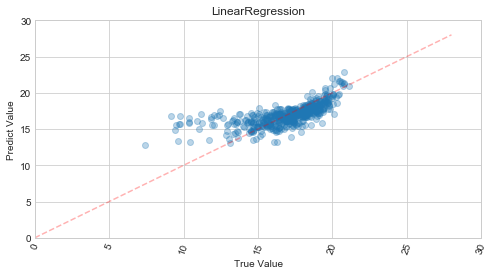

RandomForestRegressor10
MAE 1.03
RMSE 1.51


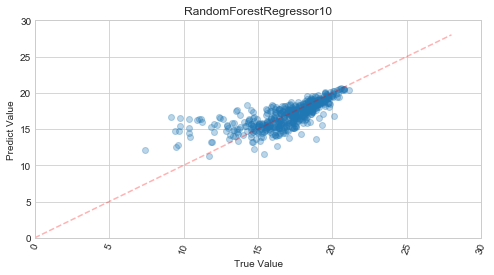

Feature Importance
              0     1
1    vote_count 0.486
0    budget_log 0.243
2    popularity 0.086
96      'Drama' 0.011
25     'Canada' 0.010
93     'Comedy' 0.010
107  'Thriller' 0.010
90     'Action' 0.009
35     'France' 0.008
104   'Romance' 0.008
RandomForestRegressor100
MAE 0.98
RMSE 1.45


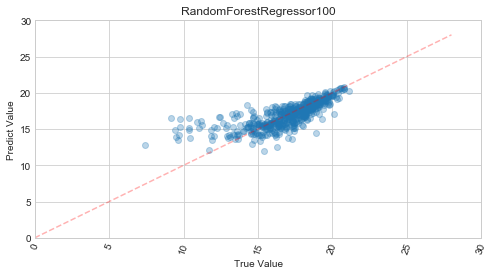

Feature Importance
              0     1
1    vote_count 0.484
0    budget_log 0.245
2    popularity 0.082
96      'Drama' 0.011
93     'Comedy' 0.010
107  'Thriller' 0.010
90     'Action' 0.010
25     'Canada' 0.008
94      'Crime' 0.008
104   'Romance' 0.008
KNeighborsRegressor
MAE 1.16
RMSE 1.63


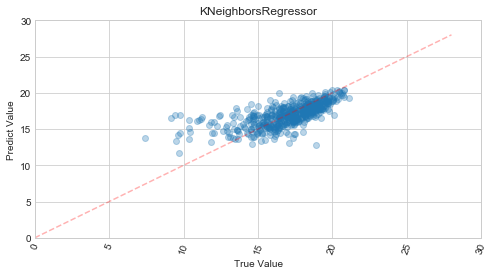

DecisionTreeRegressor
MAE 1.34
RMSE 1.94


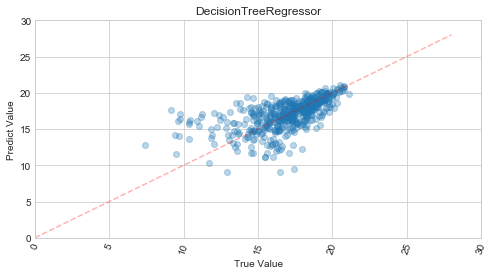

Feature Importance
              0     1
1    vote_count 0.489
0    budget_log 0.241
2    popularity 0.086
96      'Drama' 0.016
35     'France' 0.010
90     'Action' 0.010
107  'Thriller' 0.010
93     'Comedy' 0.008
94      'Crime' 0.008
25     'Canada' 0.008


,model,mae,rmse
2,RandomForestRegressor100,0.975,1.455
1,RandomForestRegressor10,1.031,1.512
0,LinearRegression,1.101,1.591
3,KNeighborsRegressor,1.163,1.628
4,DecisionTreeRegressor,1.340,1.941


In [63]:
#Creating list to loop into the functions above.
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor()),
]

results = []
for m in models:
    mae, rmse = run_experiment(m[0], m[1], X_train, y_train, X_test, y_test)
    results.append([m[0], mae, rmse])
    
# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'mae', 'rmse']
df_results = df_results.sort_values(by='mae')
df_results

# Shuffling and KFold

Here we actually take the evaluation metrics after shuffling and doing 10 Kfolds of the original dataset. This, I believe gives a more accurate result as it would avoid "lucky" test datasets. So I actually went back and ran the previous loop again after setting the X,y train and test values after running the loop below.

In [58]:
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100, n_jobs=4)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor())
]

#getting the mae and rmse of each model 10 times after shuffling.
k = 10
results = {}
for m in models:
    print('MODEL', m[0])
    results[m[0]] = {'mae':[], 'rmse':[]}
    kf = KFold(n_splits=k, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        model = m[1]
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results[m[0]]['mae'].append(mae)
        results[m[0]]['rmse'].append(rmse)

MODEL LinearRegression
MODEL RandomForestRegressor10
MODEL RandomForestRegressor100
MODEL KNeighborsRegressor
MODEL DecisionTreeRegressor


In [59]:
print(results)

{'LinearRegression': {'mae': [1.0628032124391795, 1.0745594304343018, 1.1206433061334706, 1.1024482000881852, 1.0496824643082034, 1.039229546967175, 1.007202400159836, 1.068930072208786, 1.1219929574015992, 1.0648723296877158], 'rmse': [1.4793338254982558, 1.5289537421361865, 1.610029109667989, 1.4911035706624076, 1.5043709279781996, 1.5541348224170493, 1.4040329868617263, 1.5092740181153208, 1.626248401539257, 1.4912254590028533]}, 'RandomForestRegressor10': {'mae': [1.0008250489345114, 0.9527268311777135, 0.9898183299184342, 0.9726378662020304, 1.0291979952949806, 0.915394902721805, 1.0149666740569119, 1.0328941186109566, 1.0131507512759999, 1.0005791776794613], 'rmse': [1.454520021966226, 1.3665846939192252, 1.4579760396300017, 1.3890197244121645, 1.5057479192870356, 1.2997660681933714, 1.506114513882741, 1.525963833784253, 1.4266977549797881, 1.460616598813641]}, 'RandomForestRegressor100': {'mae': [0.9568581986830077, 0.9650976493742714, 0.92843935071281, 0.9255083312210304, 0.926

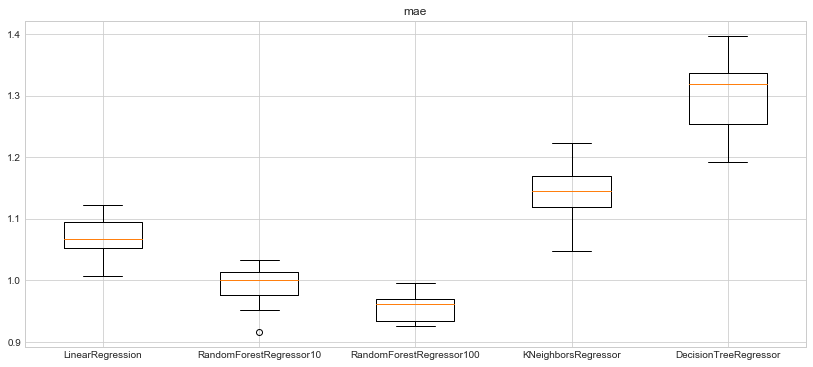

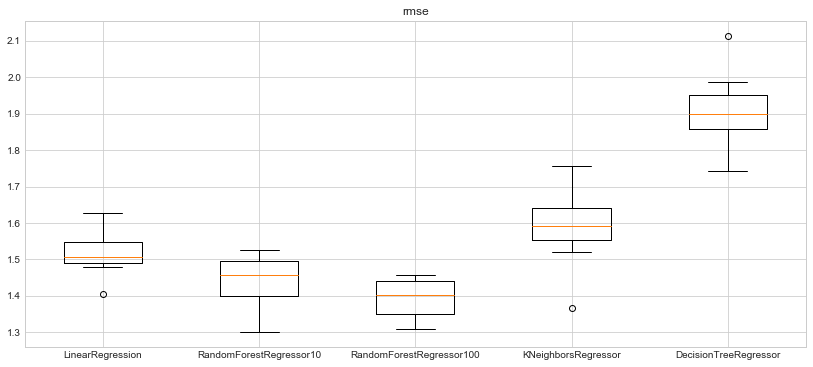

In [60]:
# Creating the box plots to see how spread out the mae and rmse is for each model after shuffling 10 times.
for metric in ['mae', 'rmse']:
    values = []
    labels = []
    for model, result_values in results.items():
        for m, v in result_values.items():
            if m == metric:
                labels.append(model)
                values.append(v)
    plt.figure(figsize=(14,6))
    plt.title(metric)
    plt.boxplot(values)
    plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
    plt.show()

It seems like the RandomForestRegressor100 is the best from the models chosen as it gives the lowest mae and rmse. Which means the predicted values are the least furthest away from the true values. Additionally, we can see from the box plots that it does not have any outliers, so no extreme deviations at any extremes.

# Error Analysis

I will do an error anlalysis on the Model with the smallest error.

In [76]:
# Model Training using the best model we found above.
model = RandomForestRegressor(n_estimators=100, n_jobs=4)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)

Below a create dataframe with all the columns and a column "error" that shows the differene between true and predicted values.

In [77]:
df_test = pd.DataFrame(X_test)
df_test.columns = X_columns
df_test['revenue_log'] = y_test
df_test['prediction'] = y_pred
df_test['error'] = abs(df_test['revenue_log']-df_test['prediction'])
df_test.sort_values(by='error', ascending=False).round()

,budget_log,vote_count,popularity,de,en,es,fr,hi,it,ja,...,'Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western',revenue_log,prediction,error
408,16.000,284.000,8.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9.000,16.000,7.000
386,17.000,63.000,3.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,10.000,16.000,7.000
411,16.000,322.000,9.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10.000,17.000,6.000
462,16.000,90.000,6.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,10.000,15.000,6.000
476,12.000,3.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,7.000,13.000,5.000
395,16.000,190.000,9.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,9.000,15.000,5.000
385,16.000,39.000,4.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,11.000,16.000,5.000
464,16.000,87.000,7.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10.000,15.000,5.000
402,15.000,12.000,2.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,10.000,15.000,5.000
32,14.000,367.000,12.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,11.000,16.000,5.000


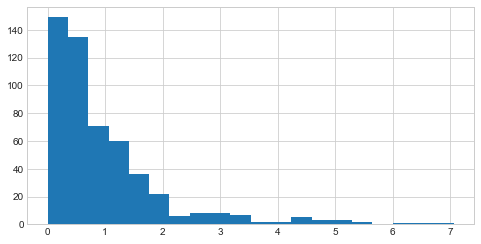

In [78]:
#Plot to show distribution of error
plt.hist(df_test['error'], bins=20)
plt.show()

How many "errors" are off by on the revenue_log above 4?

In [79]:
df_test[df_test['error']>4]

,budget_log,vote_count,popularity,de,en,es,fr,hi,it,ja,...,'Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western',revenue_log,prediction,error
32,14.152,367.000,12.063,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,11.058,15.781,4.723
171,16.951,40.000,3.612,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,11.176,15.833,4.658
185,14.914,37.000,2.850,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,9.496,13.984,4.487
229,16.341,101.000,6.139,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12.381,16.815,4.434
263,17.217,77.000,7.893,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,12.435,16.693,4.258
385,16.118,39.000,4.163,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,10.917,16.057,5.141
386,16.811,63.000,3.175,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,9.769,16.433,6.664
389,16.455,2.000,1.367,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,18.897,14.431,4.466
395,16.067,190.000,8.595,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,9.413,14.658,5.245
402,15.425,12.000,1.608,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,10.362,15.093,4.731


Below we explore which features correlate the most with the errors.

In [80]:
df_test.corr()['error'].sort_values(ascending=False)

error                     1.000
'Drama'                   0.162
fr                        0.097
'Romania'                 0.096
'France'                  0.095
'Documentary'             0.088
'Foreign'                 0.085
'Taiwan'                  0.082
'Music'                   0.071
zh                        0.063
'China'                   0.060
'Crime'                   0.050
'Hong Kong'               0.048
'Horror'                  0.045
'Japan'                   0.040
'Canada'                  0.039
ko                        0.039
'South Korea'             0.039
'Ireland'                 0.034
'Portugal'                0.032
'Russia'                  0.029
es                        0.028
it                        0.024
'Austria'                 0.020
'Botswana'                0.020
'Sweden'                  0.019
ru                        0.016
'Italy'                   0.014
'Belgium'                 0.014
'Australia'               0.011
                           ... 
'Ecuador

We see that Drama Genre, Fr movies and movies that have France or Romania as one of the production Countries has the most correlations. So let us exlore more below.

In [ ]:
pd.options.display.max_seq_items = 10000
df_dataset.columns

I want to explore how many movies have one of those parameters:

In [70]:
print(df_dataset[("'Drama'")].value_counts())

0    2725
1    2495
Name: 'Drama', dtype: int64


In [81]:
print(df_dataset[("'France'")].value_counts())

0    4866
1     354
Name: 'France', dtype: int64


In [82]:
print(df_dataset[("'Romania'")].value_counts())

0    5213
1       7
Name: 'Romania', dtype: int64


In [85]:
print(df_dataset[('fr')].value_counts())

0    5130
1      90
Name: fr, dtype: int64


Exporing Drama

In [86]:
df_drama=(df_dataset.loc[df_dataset["'Drama'"]== 1])

In [87]:
df_drama.head()

,budget,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,revenue_log,...,'Taiwan','Thailand','Tunisia','Turkey','Ukraine','United Arab Emirates','United Kingdom','United States of America','Uruguay','Venezuela'
2,16000000.000,Waiting to Exhale,3.859,1995-12-22,81452156.000,127.000,Waiting to Exhale,6.100,34.000,18.216,...,0,0,0,0,0,0,0,1,0,0
3,60000000.000,Heat,17.925,1995-12-15,187436818.000,170.000,Heat,7.700,1886.000,19.049,...,0,0,0,0,0,0,0,1,0,0
6,62000000.000,The American President,6.318,1995-11-17,107879496.000,106.000,The American President,6.500,199.000,18.497,...,0,0,0,0,0,0,0,1,0,0
7,44000000.000,Nixon,5.092,1995-12-22,13681765.000,192.000,Nixon,7.100,72.000,16.432,...,0,0,0,0,0,0,0,1,0,0
9,52000000.000,Casino,10.137,1995-11-22,116112375.000,178.000,Casino,7.800,1343.000,18.570,...,0,0,0,0,0,0,0,1,0,0


In [88]:
df_drama['profit'] = df_drama['revenue']-df_drama['budget']


C:\Users\Alka.Patel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [91]:
df_drama['profit'].sort_values(ascending=False).round()

581    1645034188.000
3858    834939099.000
3083    819558444.000
4685    791550600.000
134     743241776.000
4039    709000000.000
4640    682611174.000
3402    659827462.000
996     632806292.000
3524    630491347.000
131     622945399.000
4203    611392705.000
2194    581899420.000
5090    557443719.000
4378    540644566.000
4540    531006128.000
4624    522161890.000
5114    519801808.000
4303    510120017.000
4032    489016565.000
208     483000000.000
4574    448514353.000
3029    435349010.000
693     433306145.000
5205    419876949.000
177     416286195.000
5047    415435700.000
3885    413480871.000
716     411840909.000
239     402471524.000
            ...      
1711    -37712956.000
144     -37948000.000
557     -39458477.000
74      -39617593.000
5131    -39759022.000
2364    -39808601.000
1615    -40008098.000
3019    -40392392.000
1727    -40515669.000
1379    -40540573.000
2912    -40551918.000
2630    -41657868.000
2801    -42200000.000
1941    -43076064.000
3538    -4

In [120]:
df_drama['profit'].mean()

36635766.40801603

In [121]:
df_drama['profit'].median()

5777647.0

We can see that there are extreme losses and gains for Movies Made with the Drama Genre. There is a huge difference between the mean and median profits of films with Drama as one of the Genres.

In [95]:
print("Drama greatest loss:", (df_drama['profit'].min()))

Drama greatest loss: -91969578.0


In [96]:
print("Drama greatest profit:", (df_drama['profit'].max()))

Drama greatest profit: 1645034188.0


Exlporing any other trends:

In [97]:
df_drama['popularity'].min()

0.003013

In [98]:
df_drama['popularity'].max()

154.80100900000005

In [99]:
df_drama['vote_count'].max()

12269.0

In [100]:
df_drama['vote_count'].min()

0.0

What a huge difference between the minimum and maximum popolarity and vote_counts!

I will now explore France (which would mostly also have fr as a language factor)

In [103]:
df_france=(df_dataset.loc[df_dataset["'France'"]== 1])

In [104]:
df_france['profit'] = df_france['revenue']-df_france['budget']

C:\Users\Alka.Patel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [105]:
df_france['profit'].sort_values(ascending=False).round()

2734    642820459.000
210     420000000.000
5205    419876949.000
3885    413480871.000
4005    331141306.000
360     303927224.000
4501    277771424.000
5122    272242626.000
1472    256929795.000
3563    240228084.000
2920    204736344.000
3110    201830568.000
157     185000211.000
3623    178731369.000
5014    176952420.000
1278    176308099.000
3996    175159255.000
512     173920180.000
4305    172809600.000
1668    163921954.000
115     141567262.000
4309    137277636.000
1074    135695658.000
163     133698625.000
3163    126720069.000
846     122427960.000
479     121563139.000
2008    120583018.000
2565    119392239.000
3801    118432856.000
            ...      
4189    -21214985.000
4321    -23084528.000
4290    -23505211.000
2675    -24503683.000
75      -24649246.000
2047    -25641967.000
4952    -25787506.000
4584    -26355708.000
2603    -27055498.000
5098    -27648641.000
3373    -27793972.000
2336    -28716363.000
135     -30141861.000
1837    -31867888.000
3102    -3

In [118]:
df_france['profit'].mean()

27528991.031073447

In [119]:
df_france['profit'].median()

1782538.5

We can see that there are extreme losses and gains for Movies Made with France as a Production Country. Huge difference between the mean and median of profits.

In [108]:
print("France greatest loss:", (df_france['profit'].min()))

France greatest loss: -107447384.0


In [107]:
print("France greatest profit:", (df_france['profit'].max()))

France greatest profit: 642820459.0


Exploring any other trends:

In [109]:
df_france['popularity'].min()

0.11006500000000001

In [110]:
df_france['popularity'].max()

36.447603

In [111]:
df_france['vote_count'].min()

1.0

In [112]:
df_france['vote_count'].max()

6048.0

For France, there is not much of a dramatic difference between the popularity of the movies, but it is to be noted, that they are not terribly high. There is however, a big difference between the minimum and maximum vote counts.

We will do just a quick analysis of Romania as there are only 7 movies in the Dataset that has it as a production Country.

In [113]:
df_romania=(df_dataset.loc[df_dataset["'Romania'"]== 1])

In [114]:
df_romania['profit'] = df_romania['revenue']-df_romania['budget']

C:\Users\Alka.Patel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [115]:
df_romania['profit'].sort_values(ascending=False).round()

3591    97224271.000
2160    94013509.000
3161    37436439.000
2383    12829644.000
2638    -4290845.000
4295    -7729294.000
4589   -46675670.000
Name: profit, dtype: float64

And as expected, even if it is just 7 movies, the profit and loss differences are huge! Big Difference between the mean and median.

In [116]:
df_romania['profit'].mean()  

26115436.285714287

In [117]:
df_romania['profit'].median()

12829644.0